## NLTK 자연어 처리 패키지¶

#### NLTK(Natural Language Toolkit) : 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지

#### NLTK 패키지가 제공하는 주요 기능

* 말뭉치
* 토큰 생성
* 형태소 분석
* 품사 태깅


In [2]:
# ! pip install nltk
import nltk
nltk.__version__

'3.5'

### 말뭉치 다운로드

In [4]:
nltk.download("book",quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


#### 저작권이 말소된 문학작품을 포함하는 gutenberg 말뭉치에 들어 있는 작품 샘플들

In [6]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

#### William Shakespeare의 Hamlet (1599) : 원문을 그대로 포함

In [7]:
hamlet_raw = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
print(hamlet_raw[:924])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not a Mouse stirring

   Barn. Well, goodnight. If you do meet Horatio and
Marcellus, the Riuals of my Watch, bid them make hast.
Enter Horatio and Marcellus.

  Fran. I thinke I heare them. Stand: who's there?
  Hor. Friends to this ground

   Mar. And Leige-men to the Dane

   Fran. Giue you good night

   Mar. O farwel honest Soldier, who hath relieu'd you?
  Fra. Barnardo ha's my place: giue you goodnight.

Exit Fran.




#### Jane Austen의 Emma (1816) 

In [10]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

## 토큰 생성

#### 문자열 단위를 토큰(token)이라고 하고 문자열을 토큰으로 나누는 작업을 토큰 생성(tokenizing)이라 한다
#### 문자열을 토큰으로 분리하는 함수를 토큰 생성 함수(tokenizer)라고 한다. 토큰 생성 함수는 문자열을 입력받아 토큰 문자열의 리스트를 출력한다.

In [14]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [18]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [19]:
# 정규 표현식을 사용한 토큰 생성 : RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
retokenize =RegexpTokenizer("[\w]+")
# \w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.

retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## 형태소 분석
형태소(morpheme) : 일정한 의미가 있는 가장 작은 말의 단위, 자연어 처리에서는 토큰으로 형태소를 이용한다. <br>
형태소 분석(morphological analysis) : 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업이다 

* 어간 추출(stemming)
* 원형 복원(lemmatizing) : 표제어
* 품사 태깅(Part-Of-Speech tagging)

 ### 어간 추출(stemming)

어간 추출(stemming)은 변화된 단어의 접미사나 어미를 제거하여 같은 의미를 가지는 형태소의 기본형을 찾는 방법이다. <br>
NLTK는 `PorterStemmer`  `LancasterStemmer` 등을 제공한다. <br>
어간 추출법은 단순히 어미를 제거할 뿐이므로 단어의 원형의 정확히 찾아주지는 않는다. 

In [21]:
from nltk.stem import PorterStemmer,LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print('PorterStemmer     :',[st1.stem(w) for w in words])
print('LancasterStemmer  :',[st2.stem(w) for w in words])


PorterStemmer     : ['fli', 'fli', 'fli', 'flew', 'flown']
LancasterStemmer  : ['fly', 'fli', 'fly', 'flew', 'flown']


### 표제어(원형) 추출 (lemmatization)
lemmatization 은 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업이다. <br>
품사(part of speech)를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다.

- Stemming

   am → am|

   the going → the go

   having → hav
   
<br>

- Lemmatization

  am → be

  the going → the going

  having → have

In [22]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w,pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

## 품사 태깅

품사(POS, part-of-speech)는 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것이다. 품사의 구분은 언어마다 그리고 학자마다 다르다.<br>
예를 들어 NLTK에서는 펜 트리뱅크 태그세트(Penn Treebank Tagset)라는 것을 이용한다. 다음은 펜 트리뱅크 태그세트에서 사용하는 품사의 예이다.

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

https://dbrang.tistory.com/1139

* NNP: 단수 고유명사
* VB: 동사
* VBP: 동사 현재형
* TO: to 전치사
* NN: 명사(단수형 혹은 집합형)
* DT: 관형사

`nltk.help.upenn_tagset` 명령으로 자세한 설명을 볼 수 있다.

In [23]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


`pos_tag` 명령을 사용하면 단어 토큰에 품사를 부착하여 튜플로 출력한다. <br>
다음 예문에서 refuse, permit이라는 같은 철자의 단어가 각각 동사와 명사로 다르게 품사 태깅된 것을 볼 수 있다 

In [24]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
print(word_tokenize(sentence))
tagged_list

['Emma', 'refused', 'to', 'permit', 'us', 'to', 'obtain', 'the', 'refuse', 'permit']


[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

품사 태그 정보를 사용하면 명사인 토큰만 선택할 수 있다.

In [26]:
nouns_list = [t[0] for t in tagged_list if t[1] == 'NN']
nouns_list

['permit', 'obtain']

`untag` 명령을 사용하면 태그 튜플을 제거할 수 있다.

In [27]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

Scikit-Learn 등에서 자연어 분석을 할 때는 같은 토큰이라도 품사가 다르면 다른 토큰으로 처리해야 하는 경우가 많은데 
이 때는 원래의 토큰과 품사를 붙여서 새로운 토큰 이름을 만들어 사용하면 철자가 같고 품사가 다른 단어를 구분할 수 있다.

In [30]:
def tokenizer(doc):
    tagged_list = pos_tag(word_tokenize(doc))
    return ['/'.join(p) for p in tagged_list]
tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

## Text 클래스

NLTK의 `Text` 클래스는 문서 분석에 유용한 여러가지 메서드를 제공한다. 토큰열을 입력하여 생성한다.

In [36]:
from nltk import Text
from matplotlib import pyplot as plt

text = Text(retokenize.tokenize(emma_raw))  #  전체 데이터를 사용
print(type(text))
text

<class 'nltk.text.Text'>


<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>

plot() 메소드를 사용하면 각 단어(토큰)의 사용 빈도를 그래프로 그려준다.

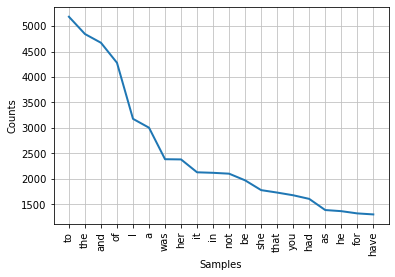

In [40]:
text.plot(20)  # 20개 단어의 빈도
plt.show()

dispersion_plot() 메서드는 단어가 사용된 위치를 시각화한다. 소설 엠마의 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

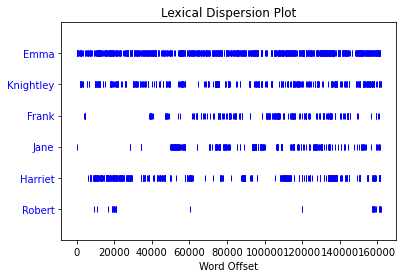

In [41]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

concordance() 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다. 여기에서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다.

In [42]:
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

similar() 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다

In [43]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


두 단어의 공통 문맥을 보려면 `common_contexts` 메서드를 사용한다

In [44]:
text.common_contexts(["Emma","she"])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


## FreqDist  :  Frequency Distributions

`FreqDist` 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다. `Text` 클래스의 `vocab` 메서드로 추출할 수 있다.

In [45]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]  # 불용어
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == 'NNP' and t[0] not in stopwords]
print(names_list[:10])

['Jane', 'Austen', 'VOLUME', 'Emma', 'Woodhouse', 'Sixteen', 'Taylor', 'Woodhouse', 'Emma', 'Between']


In [46]:
fd_names = FreqDist(names_list)

`FreqDist` 클래스는 단어를 키(key), 출현빈도를 값(value)으로 가지는 사전 자료형과 유사하다. 다음 코드는 전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률을 각각 계산한다.

In [48]:
fd_names.N(),fd_names['Emma'],fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

`most_common` 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

In [49]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

## 워드클라우드

In [55]:
# ! pip install wordcloud

wordcloud 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드(Word Cloud) 시각화를 할 수 있다.

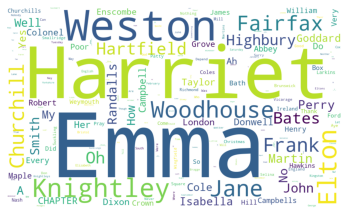

In [56]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()